### Import all required library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
from warnings import filterwarnings
filterwarnings('ignore')
from numpy.linalg import inv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
data = pd.read_csv("C:\Users\nachi\Documents\Sales_Prediction\Advertising.csv")

In [3]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data = data.drop('Unnamed: 0', axis = 1)

In [5]:
data.sample(5)

,TV,Radio,Newspaper,Sales
192,17.2,4.1,31.6,5.9
158,11.7,36.9,45.2,7.3
96,197.6,3.5,5.9,11.7
179,165.6,10.0,17.6,12.6
85,193.2,18.4,65.7,15.2


In [6]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
type(data['TV'][0])

numpy.float64

In [ ]:
figure = px.scatter(data_frame = data, x="TV",
                    y="Sales", size="TV", trendline="ols")
figure.show()

figure = px.scatter(data_frame = data, x="Newspaper",
                    y="Sales", size="Newspaper", trendline="ols")
figure.show()

figure = px.scatter(data_frame = data, x="Radio",
                    y="Sales", size="Radio", trendline="ols")
figure.show()

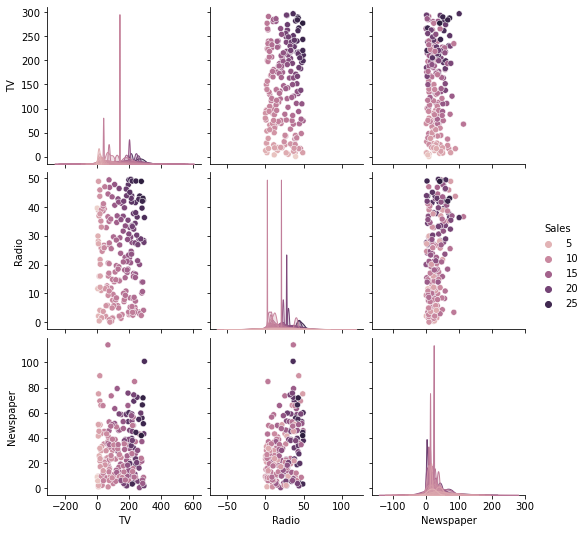

In [9]:
sns.pairplot(data,hue='Sales')

### Scatter plot for analysis

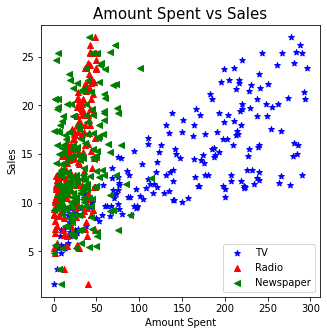

In [10]:
plt.figure(figsize=(5, 5))
plt.scatter(data['TV'],data['Sales'], c="blue", label="TV", marker = '*')
plt.scatter(data['Radio'],data['Sales'], c="red", label="Radio", marker = '^')
plt.scatter(data['Newspaper'],data['Sales'], c="green", label="Newspaper", marker = '<')
plt.xlabel("Amount Spent")
plt.ylabel("Sales")
plt.title("Amount Spent vs Sales", fontsize=15)
plt.legend()
plt.show()

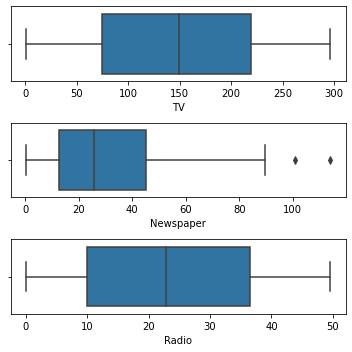

In [11]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(data['TV'], ax = axs[0])
plt2 = sns.boxplot(data['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(data['Radio'], ax = axs[2])
plt.tight_layout()
plt.show()

In [12]:
correlation = data.corr()
print(correlation["Sales"].sort_values(ascending=False))

Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64


### Showing heatmap for analysis

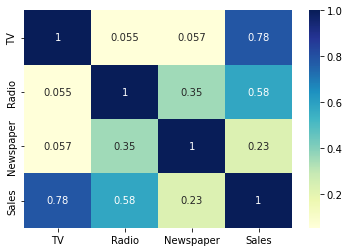

In [13]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [14]:
x = np.array(data.drop(['Sales'], axis=1))
y = np.array(data['Sales'])

Xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
model = LinearRegression()
model.fit(Xtrain, ytrain)
print(model.score(xtest, ytest))

0.899438024100912


In [16]:
import pickle 
pickle.dump(model, open('model.pkl','wb'))

### features = (TV, Radio, Newspaper)

In [17]:
features = np.array([[400, 0, 0]])
print(model.predict(features))

[20.87087433]
